In [3]:
# from torchsr.datasets import Div2K
# from torchsr.models import ninasr_b0
from utils.training_utils import BabySINE, ImageDataset, pixel_coordinates_normalized, plot_image, list_png_files, load_image
from torch.utils.data import DataLoader
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

# Autoreload
%reload_ext autoreload
%autoreload 2

# Div2K dataset
# dataset = Div2K(root="./data", scale=2, download=False)

In [4]:
# List all PNG files in the data folder
data_folder = "data"
image_files = list_png_files(data_folder)
print(f"Available PNG files: {image_files}")

Available PNG files: ['0010.png', '0028.png', '0002.png']


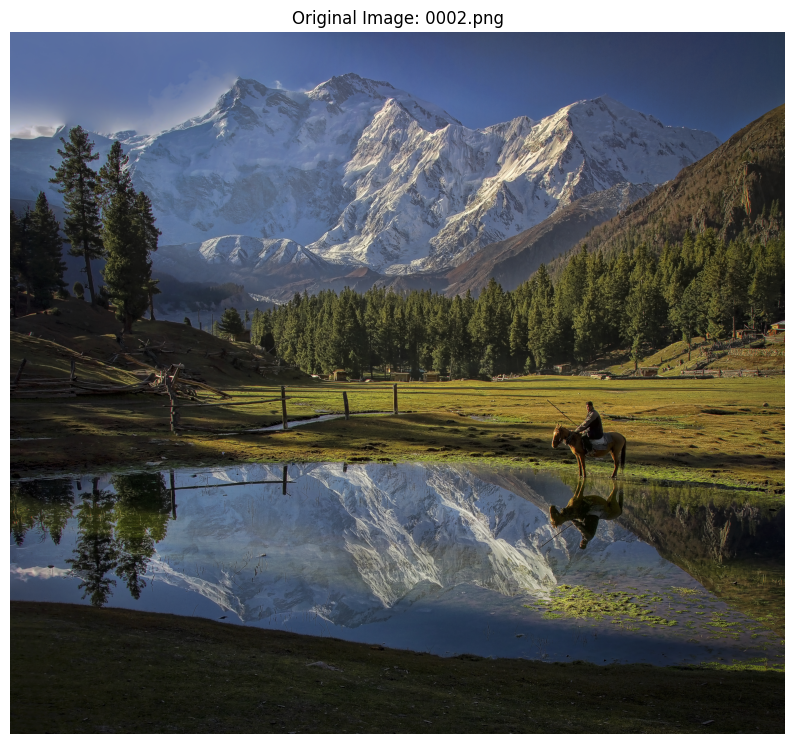

Image dimensions: 1848x2040, 3 channels


In [ ]:
img_file_path = image_files[-2]
img_np_original, height_target, width_target, channels = load_image(data_folder, img_file_path)

In [ ]:
# Downsample the image and generate coordinates and pixel values
downsize_factor = 10
low_res_coords, pixel_values, norm_image, x, y, high_res_coords = pixel_coordinates_normalized(
    img_np_original, downsize_factor
)

The original image has shape: (1848, 2040, 3)


In [7]:
# Create dataset and dataloader
dataset = ImageDataset(low_res_coords, pixel_values)
dataloader = DataLoader(dataset, batch_size=4096, shuffle=True)

In [8]:
# Initialize the model
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
model = BabySINE(sigma=10.0, omega_0=15).to(device)

In [9]:
# Train the model
losses = model.train_model(
    dataloader,
    num_epochs=300,
    lr=1e-4,
    sigma=10.0,
)

Using device: mps


  0%|          | 1/300 [00:02<11:03,  2.22s/it]

Epoch 0, Loss: 1.226736


  4%|▎         | 11/300 [00:07<02:31,  1.91it/s]

Epoch 10, Loss: 0.595976


  7%|▋         | 21/300 [00:12<02:20,  1.98it/s]

Epoch 20, Loss: 0.580398


 10%|█         | 31/300 [00:17<02:24,  1.86it/s]

Epoch 30, Loss: 0.572781


 14%|█▎        | 41/300 [00:22<02:09,  2.00it/s]

Epoch 40, Loss: 0.568738


 17%|█▋        | 51/300 [00:27<02:06,  1.97it/s]

Epoch 50, Loss: 0.564682


 20%|██        | 61/300 [00:33<02:01,  1.96it/s]

Epoch 60, Loss: 0.561973


 24%|██▎       | 71/300 [00:38<01:55,  1.99it/s]

Epoch 70, Loss: 0.559849


 27%|██▋       | 81/300 [00:43<01:56,  1.89it/s]

Epoch 80, Loss: 0.557533


 30%|███       | 91/300 [00:48<01:43,  2.02it/s]

Epoch 90, Loss: 0.555689


 34%|███▎      | 101/300 [00:53<01:41,  1.96it/s]

Epoch 100, Loss: 0.553596


 37%|███▋      | 111/300 [00:58<01:39,  1.89it/s]

Epoch 110, Loss: 0.552174


 40%|████      | 121/300 [01:04<01:33,  1.91it/s]

Epoch 120, Loss: 0.550053


 44%|████▎     | 131/300 [01:09<01:28,  1.91it/s]

Epoch 130, Loss: 0.548791


 47%|████▋     | 141/300 [01:14<01:23,  1.90it/s]

Epoch 140, Loss: 0.547082


 50%|█████     | 151/300 [01:20<01:20,  1.85it/s]

Epoch 150, Loss: 0.545738


 54%|█████▎    | 161/300 [01:25<01:12,  1.91it/s]

Epoch 160, Loss: 0.544835


 57%|█████▋    | 171/300 [01:30<01:06,  1.94it/s]

Epoch 170, Loss: 0.543366


 60%|██████    | 181/300 [01:35<01:01,  1.93it/s]

Epoch 180, Loss: 0.543851


 64%|██████▎   | 191/300 [01:40<00:54,  1.99it/s]

Epoch 190, Loss: 0.541646


 67%|██████▋   | 201/300 [01:45<00:50,  1.96it/s]

Epoch 200, Loss: 0.541513


 70%|███████   | 211/300 [01:51<00:45,  1.96it/s]

Epoch 210, Loss: 0.540826


 74%|███████▎  | 221/300 [01:56<00:42,  1.86it/s]

Epoch 220, Loss: 0.541891


 77%|███████▋  | 231/300 [02:01<00:35,  1.94it/s]

Epoch 230, Loss: 0.540015


 80%|████████  | 241/300 [02:06<00:30,  1.97it/s]

Epoch 240, Loss: 0.539673


 84%|████████▎ | 251/300 [02:11<00:25,  1.94it/s]

Epoch 250, Loss: 0.540149


 87%|████████▋ | 261/300 [02:16<00:20,  1.94it/s]

Epoch 260, Loss: 0.539599


 90%|█████████ | 271/300 [02:21<00:14,  1.96it/s]

Epoch 270, Loss: 0.538423


 94%|█████████▎| 281/300 [02:27<00:09,  1.91it/s]

Epoch 280, Loss: 0.540115


 97%|█████████▋| 291/300 [02:32<00:04,  1.93it/s]

Epoch 290, Loss: 0.538924


100%|██████████| 300/300 [02:36<00:00,  1.91it/s]


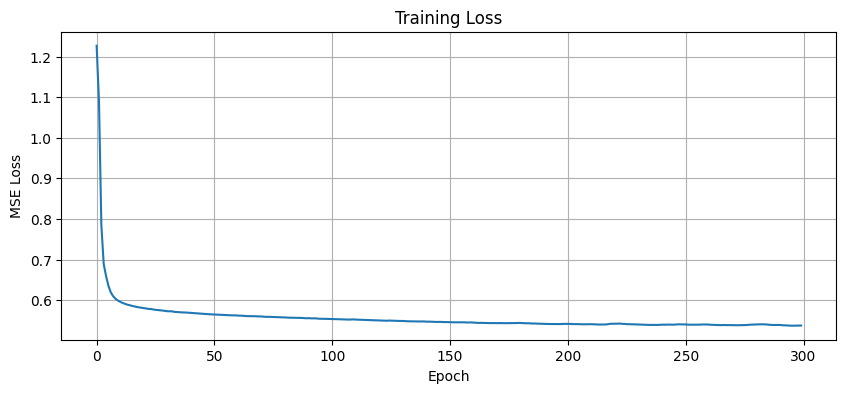

In [10]:
# Plot the loss curve
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

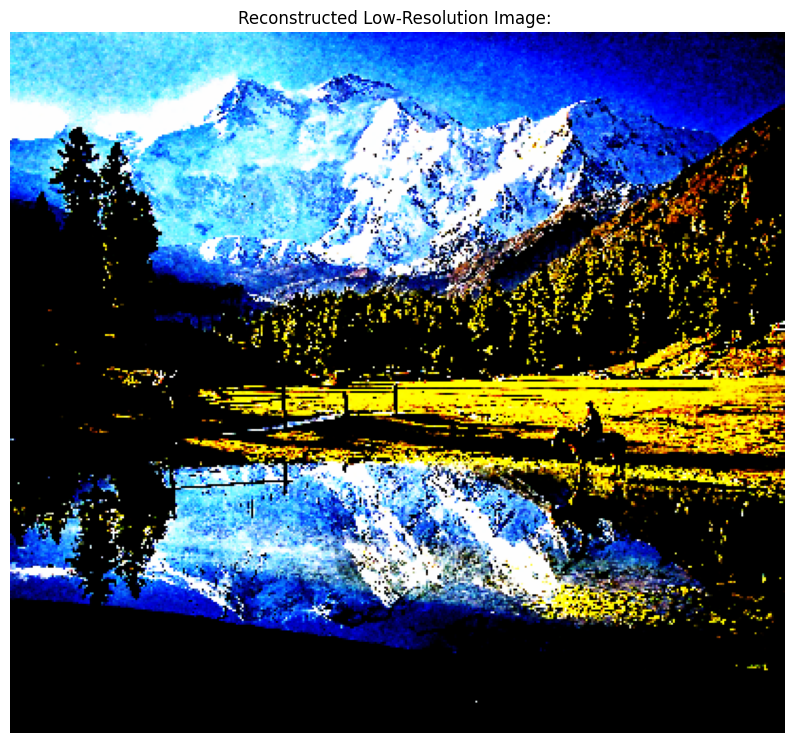

Image dimensions: 369x408, 3 channels


In [13]:
# Reconstruct the low-resolution image (learned during training)
target_coords_tensor_lr = torch.from_numpy(low_res_coords).float().to(device)
with torch.no_grad():
    pred_pixels_lr = model(target_coords_tensor_lr).cpu().numpy()

# Reshape and denormalize the predicted pixels for the low-resolution image
reconstructed_img_lr_normalized = pred_pixels_lr.reshape(x, y, 3)
reconstructed_img_lr_denormalized = (reconstructed_img_lr_normalized * 255).astype(np.uint8)
reconstructed_img_lr_denormalized = np.clip(reconstructed_img_lr_denormalized, 0, 255)

# Plot the reconstructed low-resolution image
plot_image(reconstructed_img_lr_denormalized, "Reconstructed Low-Resolution")

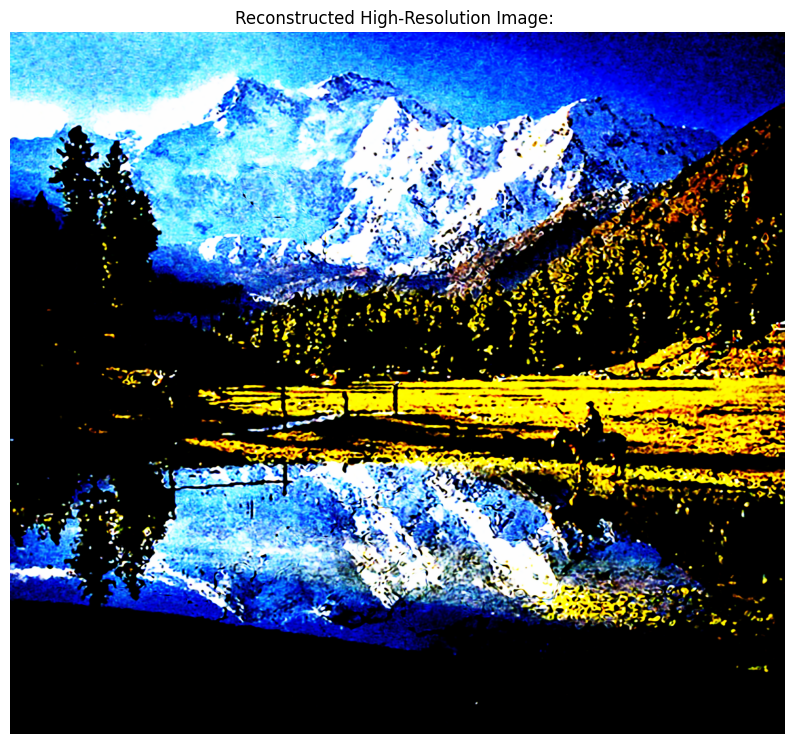

Image dimensions: 1848x2040, 3 channels


In [12]:
# Reconstruct the high-resolution image (using high-resolution coordinates)
target_coords_tensor_hr = torch.from_numpy(high_res_coords).float().to(device)
with torch.no_grad():
    pred_pixels_hr = model(target_coords_tensor_hr).cpu().numpy()

# Reshape and denormalize the predicted pixels for the high-resolution image
reconstructed_img_hr_normalized = pred_pixels_hr.reshape(img_np_original.shape[0], img_np_original.shape[1], 3)
reconstructed_img_hr_denormalized = (reconstructed_img_hr_normalized * 255).astype(np.uint8)
reconstructed_img_hr_denormalized = np.clip(reconstructed_img_hr_denormalized, 0, 255)

# Plot the reconstructed high-resolution image
plot_image(reconstructed_img_hr_denormalized, "Reconstructed High-Resolution")